# Stats about https://ctftime.org

In [1]:
import datetime
datetime.datetime.now()

datetime.datetime(2022, 5, 30, 21, 11, 30, 453781)

## Top rated CTFs

In [2]:
!pip install lxml

You should consider upgrading via the '/home/hvn/py3/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install html5lib

You should consider upgrading via the '/home/hvn/py3/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd

In [5]:
import requests

In [6]:
ff_header = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:99.0) Gecko/20100101 Firefox/99.0'}

In [7]:
r = requests.get(
    'https://ctftime.org/ctfs',
    headers=ff_header)

In [8]:
import bs4

In [9]:
tree = bs4.BeautifulSoup(markup=r.text)

In [10]:
tiles = tree.find_all('li', attrs={'class': "span4 ctf-tile"})

In [11]:
tile = tiles[0]

In [12]:
tile.find('p').text

'\nOfficial URL\nTotal events: 18\nAvg weight: 39.79'

In [13]:
data = []
for tile in tiles:
    title = tile.find('a').text

    *_, events, avg_weight = tile.find('p').text.strip().splitlines()
    # print(title, avg_weight, events)

    data.append((title, float(avg_weight.split(':')[-1]), int(events.split(':')[-1])))

In [14]:
df = pd.DataFrame(data=data,
                 columns=['name', 'avg_weight', 'events'])
df.head()

,name,avg_weight,events
0,SECCON CTF,39.79,18
1,UCSB iCTF,46.30,16
2,Insomni'hack,38.02,16
3,0CTF,72.79,14
4,Trend Micro CTF - Raimund Genes Cup,22.42,14


In [15]:
df.sort_values('avg_weight').tail(30)

,name,avg_weight,events
17,Codegate CTF Preliminary,46.54,10
63,SECUINSIDE CTF Quals,47.35,5
43,CTFZone,47.67,7
72,EKOPARTY CTF,47.88,5
99,N1CTF,47.91,4
36,bi0sCTF,48.23,7
38,ångstromCTF,50.64,7
19,ASIS CTF Quals,51.13,10
119,RuCTF Quals,53.33,3
159,saarCTF,53.54,3


In [16]:
df[df['events']>=12]

,name,avg_weight,events
0,SECCON CTF,39.79,18
1,UCSB iCTF,46.30,16
2,Insomni'hack,38.02,16
3,0CTF,72.79,14
4,Trend Micro CTF - Raimund Genes Cup,22.42,14
5,RuCTF Finals,31.43,13
6,DEF CON CTF Qualifier,80.49,12
7,DEF CON CTF,82.60,12
8,RuCTF,74.06,12
9,PlaidCTF,89.17,12


array([[<AxesSubplot:title={'center':'avg_weight'}>,
        <AxesSubplot:title={'center':'events'}>]], dtype=object)

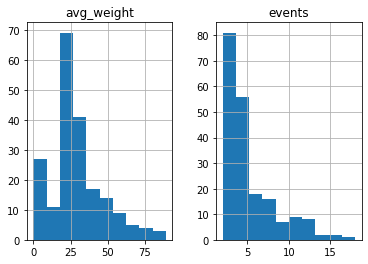

In [17]:
df.hist()

In [18]:
df.describe()

,avg_weight,events
count,200.000000,200.000000
mean,28.693050,5.105000
std,18.152294,3.148578
min,0.000000,2.000000
25%,20.000000,3.000000
50%,25.560000,4.000000
75%,36.332500,6.000000
max,89.170000,18.000000


## PYMI team

CTF write-up https://github.com/pymivn/ctf

https://ctftime.org/team/175619

In [19]:
rt = requests.get('https://ctftime.org/team/175619', 
                 headers=ff_header)
rt

<Response [200]>

In [20]:
dft = pd.read_html(rt.text)[0]
dft.head()

,Place,Place.1,Event,CTF points,Rating points
0,NaN,109,DEF CON CTF Qualifier 2022,73.0,2.859
1,NaN,257,Hack-A-Sat 3 Qualifiers,36.0,0.523
2,NaN,33,Cyber Apocalypse CTF 2022: Intergalactic Chase,12200.0,16.155
3,NaN,433,m0leCon CTF 2022 Teaser,50.0,0.786
4,NaN,29,San Diego CTF 2022,3640.0,10.036


In [21]:
dft.drop(columns=['Place']).sort_values('Rating points', ascending=False)[:10]

,Place.1,Event,CTF points,Rating points
5,140,ångstromCTF 2022,1510.0,18.171
2,33,Cyber Apocalypse CTF 2022: Intergalactic Chase,12200.0,16.155
18,41,DefCamp CTF 21-22 Online,1208.0,11.179
4,29,San Diego CTF 2022,3640.0,10.036
6,45,NahamCon CTF 2022,8314.0,8.572
13,59,1337UP LIVE CTF,2815.0,6.112
7,75,b01lers CTF,654.0,5.761
17,54,VU CYBERTHON 2022,174.0,5.323
10,67,Space Heroes CTF,2367.0,5.226
0,109,DEF CON CTF Qualifier 2022,73.0,2.859
